In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
start_date = '2017-08-01'
end_date = '2017-08-07'
#calcultate temp stats and list them
temp_stats =y_a = list(np.ravel(calc_temps(start_date, end_date)))
temp_stats

[72.0, 79.25, 83.0]

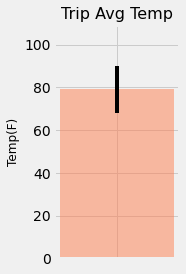

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
##-----------------------------------------------------------------------##

#Set y axis values for the bar chart
y_value = temp_stats[1]
x = [""]

#calculate y error
yerr = max(temp_stats) - min(temp_stats)

#generate a plot
plt.figure(figsize=(2,4))
plt.bar(x, y_value , color ='coral' , alpha = 0.5 , yerr = yerr)
plt.title("Trip Avg Temp" , fontsize = 16)
plt.ylabel("Temp(F)" , fontsize = 12)
plt.ylim(0, y_value+30)

plt.savefig("Images/Temperature_Analysis_2.png" , bbox_inches='tight')
plt.show()
plt.tight_layout()


### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
#function to calculate total rain
total_rain =func.sum(Measurement.prcp)

sel = [Measurement.station, Measurement.date, total_rain, 
       Measurement.tobs, Station.name, Station.latitude, 
       Station.longitude, Station.elevation]

#Create a querry object by joining station and measument tables
total_rain_obj = session.query(*sel).filter(Measurement.station == Station.station).\
                                                 filter(Measurement.date >= start_date).\
                                                 filter(Measurement.date <= end_date).\
                                                 group_by(Measurement.station).\
                                                 order_by(total_rain.desc()).all()

                           

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
statn=[]
name =[]
prp =[]
lati=[]
longi=[]
ele =[]
for row in total_rain_obj:
    statn.append(row.station)
    name.append(row.name)
    prp.append(row[2])
    lati.append(row.latitude)
    longi.append(row.longitude)
    ele.append(row.elevation)
                    
                     
total_rain_df = pd.DataFrame({"Station" : statn,
                   "Name" : name , 
                   "Precipitation" : prp ,
                   "Latitude" :  lati ,
                   "Longitude" : longi ,
                   "Elevation" :ele
                   
            
})
total_rain_df

,Station,Name,Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.36,21.33310,-157.80250,152.4
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.22,21.52130,-157.83740,7.0
2,USC00519281,"WAIHEE 837.5, HI US",0.06,21.45167,-157.84889,32.9
3,USC00519397,"WAIKIKI 717.2, HI US",0.04,21.27160,-157.81680,3.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.00,21.33556,-157.71139,19.5


In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("08-01")

[(67.0, 75.54, 83.0)]

In [14]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
start = dt.datetime.strptime(start_date, "%Y-%m-%d")
end = dt.datetime.strptime(end_date, "%Y-%m-%d")
date_array = \
    (start + dt.timedelta(days=x) for x in range(0, (end-start).days+1))
date_array

<generator object <genexpr> at 0x0000025B2BD23BF8>

In [15]:
# Strip off the year and save a list of strings in the format %m-%d
month_day_range = [date_object.strftime("%m-%d") for date_object in date_array]

month_day_range

['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']

In [16]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normals = [daily_normals(date)[0] for date in month_day_range]
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [17]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
Vacation_dailynormals = pd.DataFrame(normals , columns = ["T_min" , "T_avg" , "T_max"])
Vacation_dailynormals["Date"] = ["2017-" + date for date in month_day_range]
Vacation_dailynormals.set_index("Date" , drop =True , inplace=True)
Vacation_dailynormals

,T_min,T_avg,T_max
Date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


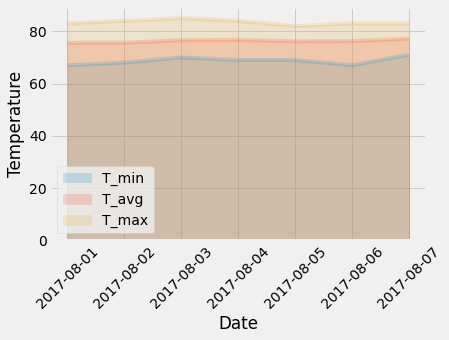

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot the daily normals as an area plot with `stacked=False`

Vacation_dailynormals.plot(kind='area' ,stacked=False ,rot =45 , alpha =0.2 )
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.savefig("./Images/Temperature_Analysis_3.png" ,bbox_inches='tight')

plt.show()
plt.tight_layout()

## Close Session

In [19]:
session.close()